In [19]:
from scipy.stats import gamma, norm
import numpy
import pandas
import math
import os
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as pyplot
from lv_mobility import LVMM
from plots import plot_fit

# Test individual states

In [20]:
def we(a):
    n = len(a)
    b = math.floor(n/7)
    nn = b*7
    a = a[0:nn]
    a = a.values.reshape((b, 7))
    a = numpy.sum(a, axis=1)
    a = a.reshape((1, b))
    return a

df = pandas.read_csv(os.path.join(os.getcwd(), "data/state_full.csv"))
df = df[df["state"] != "pr"]

date = df["date"]
deaths = df["ndeaths"]
home = df["completely_home_prop"]
work = df["full_time_work_prop"]
cases = df["ncases"]
state = df["state"]
State = pandas.unique(state)
deaths[deaths < 0] = 0

Y = A = C = None
n = len(deaths)
for i in range(0, 51):
    if i == 0:
        I = (state == State[i])
        Y = we(deaths[I])
        A = we(home[I])  # using HOME
        C = we(cases[I])
    else:
        I = (state == State[i])
        Y = numpy.concatenate([Y, we(deaths[I])])
        A = numpy.concatenate([A, we(home[I])])  # using HOME
        C = numpy.concatenate([C, we(cases[I])])

In [21]:
#initialize death curve
l = 16 #length of time interval
t = numpy.linspace(start=0, stop=l, num=l+1)
ft = gamma.pdf(t*7, scale=3.64, a=6.28)  # a - shape parameter
ft = (ft/sum(ft)) * 0.03
x = range(1, l+1)

keys = ['A', 'alpha', 'beta', 'mu', 'sig']

#intialize your mobility time series by selecting the index for your state
i=2

model = LVMM()
y_true = Y[i, :l]
m = A[i, :l]

In [22]:
#Fit model
model.fit(
    M=m,
    DC=ft[:l],
    y_true=y_true,
)

y_pred = model.preds

In [23]:
model.args

{'A': 0.29896900277215616,
 'alpha': -1.1633246957590113,
 'beta': 1.098842537996063,
 'mu': -1.668444429302781,
 'sig': 1e-05,
 'M': array([1.46104406, 1.5200612 , 1.61381331, 1.52605252, 1.62909915,
        1.41461628, 1.38812132, 1.70223098, 2.13268644, 2.09180085,
        2.35881594, 2.2888028 , 2.12219974, 2.04254759, 1.97069726,
        1.87603477]),
 'DC': array([0.00000000e+00, 1.36714678e-03, 7.76375505e-03, 9.65277041e-03,
        6.44387059e-03, 3.05949665e-03, 1.17096864e-03, 3.86226989e-04,
        1.14250577e-04, 3.11001172e-05, 7.92829643e-06, 1.91668861e-06,
        4.43499839e-07, 9.89135279e-08, 2.13800701e-08, 4.49814289e-09])}

Text(0.5, 1.0, 'ar')

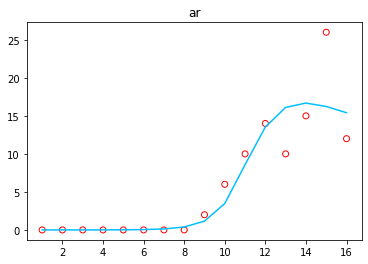

In [32]:
# plotting predictions and observations for State[i]
pyplot.scatter(x[:l],y_true[:l],facecolors="none", edgecolors="r")
pyplot.plot(x[:l],y_pred, color='deepskyblue')
pyplot.title(State[i])

In [25]:
l2 = 25
 
t = numpy.linspace(start=0, stop=l2, num=l2+1)
ft = gamma.pdf(t*7, scale=3.64, a=6.28)  # a - shape parameter
ft = (ft/sum(ft)) * 0.03
x = range(1, l2+1)

keys = ['A', 'alpha', 'beta', 'mu', 'sig']

# training loop
i=2

y_true = Y[i, :l2]

forecast = model.forecast(
    l=l2,
)

Text(0.5, 1.0, 'ar')

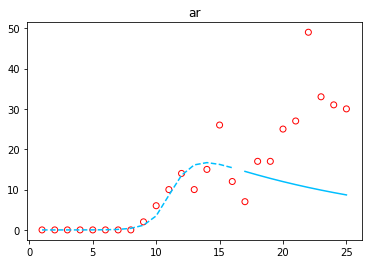

In [37]:
# plotting predictions and observations for State[i]
pyplot.scatter(x,y_true,facecolors="none", edgecolors="r")
pyplot.plot(x[:l],forecast[:l],linestyle='--',color='deepskyblue')
pyplot.plot(x[l:],forecast[l:],color='deepskyblue')
pyplot.title(State[i])

# Test for global parameters

In [39]:
def we(a):
    n = len(a)
    b = math.floor(n/7)
    nn = b*7
    a = a[0:nn]
    a = a.values.reshape((b, 7))
    a = numpy.sum(a, axis=1)
    a = a.reshape((1, b))
    return a

df = pandas.read_csv(os.path.join(os.getcwd(), "data/state_full.csv"))
df = df[df["state"] != "pr"]

date = df["date"]
deaths = df["ndeaths"]
home = df["completely_home_prop"]
work = df["full_time_work_prop"]
cases = df["ncases"]
state = df["state"]
State = pandas.unique(state)
deaths[deaths < 0] = 0

Y = A = C = None
n = len(deaths)
for i in range(0, 51):
    if i == 0:
        I = (state == State[i])
        Y = we(deaths[I])
        A = we(home[I])  # using HOME
        C = we(cases[I])
    else:
        I = (state == State[i])
        Y = numpy.concatenate([Y, we(deaths[I])])
        A = numpy.concatenate([A, we(home[I])])  # using HOME
        C = numpy.concatenate([C, we(cases[I])])

In [53]:
Y_global = Y.mean(axis=0)
A_global = A.mean(axis=0)

In [57]:
#initialize death curve
l = 18 #length of time interval
t = numpy.linspace(start=0, stop=l, num=l+1)
ft = gamma.pdf(t*7, scale=3.64, a=6.28)  # a - shape parameter
ft = (ft/sum(ft)) * 0.03
x = range(1, l+1)

keys = ['A', 'alpha', 'beta', 'mu', 'sig']

model_global = LVMM()
y_true = Y_global[:l]
m = A_global[:l]

In [58]:
#Fit model
model_global.fit(
    M=m,
    DC=ft[:l],
    y_true=y_true,
)

y_pred = model_global.preds

/home/xiavatar/Projects/hdt-forecast/hdt_models/lv_mobility/model.py:78: RuntimeWarning: overflow encountered in exp
  out = out + DC0*numpy.exp(BetaSum[d])
/home/xiavatar/Projects/hdt-forecast/hdt_models/lv_mobility/model.py:78: RuntimeWarning: invalid value encountered in multiply
  out = out + DC0*numpy.exp(BetaSum[d])


In [59]:
model_global.args

{'A': 2.157216450149013,
 'alpha': -1.4886589378033166,
 'beta': 1.2693302598392506,
 'mu': 1.8208861583220823,
 'sig': 0.0005217676020068413,
 'M': array([1.59135849, 1.69588091, 1.8062904 , 1.70288027, 1.77383164,
        1.63931007, 1.55674433, 1.86226027, 2.45690198, 2.59044121,
        2.88250739, 2.87095749, 2.71652831, 2.55703033, 2.55620104,
        2.49637179, 2.395036  , 2.28157631]),
 'DC': array([0.00000000e+00, 1.36714677e-03, 7.76375499e-03, 9.65277033e-03,
        6.44387054e-03, 3.05949663e-03, 1.17096864e-03, 3.86226987e-04,
        1.14250576e-04, 3.11001170e-05, 7.92829637e-06, 1.91668859e-06,
        4.43499836e-07, 9.89135272e-08, 2.13800699e-08, 4.49814286e-09,
        9.24364396e-10, 1.86070836e-10])}

Text(0.5, 1.0, 'ar')

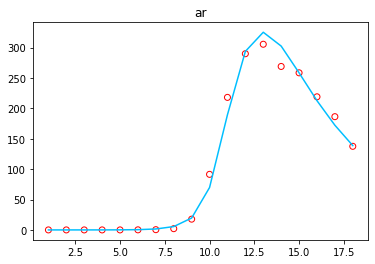

In [60]:
# plotting predictions and observations for State[i]
pyplot.scatter(x[:l],y_true[:l],facecolors="none", edgecolors="r")
pyplot.plot(x[:l],y_pred, color='deepskyblue')
pyplot.title(State[i])

In [63]:
l2 = 25
 
t = numpy.linspace(start=0, stop=l2, num=l2+1)
ft = gamma.pdf(t*7, scale=3.64, a=6.28)  # a - shape parameter
ft = (ft/sum(ft)) * 0.03
x = range(1, l2+1)

keys = ['A', 'alpha', 'beta', 'mu', 'sig']

y_true = Y_global[:l2]

forecast = model_global.forecast(
    l=l2,
)

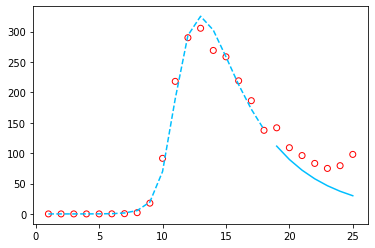

In [64]:
# plotting predictions and observations for State[i]
pyplot.scatter(x,y_true,facecolors="none", edgecolors="r")
pyplot.plot(x[:l],forecast[:l],linestyle='--',color='deepskyblue')
pyplot.plot(x[l:],forecast[l:],color='deepskyblue')

In [66]:
list(A[i,:l2])

[1.46104406172111,
 1.52006119742889,
 1.6138133108794,
 1.52605251704846,
 1.6290991506982797,
 1.41461628442162,
 1.38812131636633,
 1.7022309846971502,
 2.13268644103909,
 2.09180084985199,
 2.35881594052098,
 2.28880280195796,
 2.12219974251835,
 2.04254758503004,
 1.97069725625296,
 1.876034770541,
 1.89833497947555,
 1.8297301772063204,
 1.6688396914323702,
 1.68060033564074,
 1.7397058856475702,
 1.6608398304435197,
 1.68143693723331,
 1.73931047859453,
 1.7024008608255499]

In [81]:
i=10
l2 = 21
 
t = numpy.linspace(start=0, stop=l2, num=l2+1)
ft = gamma.pdf(t*7, scale=3.64, a=6.28)  # a - shape parameter
ft = (ft/sum(ft)) * 0.03
x = range(1, l2+1)

keys = ['A', 'alpha', 'beta', 'mu', 'sig']


y_true = Y[i,:l2]

forecast = model_global.forecast(
    l=l2,
    M=list(A[i,:l2])
)

Text(0.5, 1.0, 'ga')

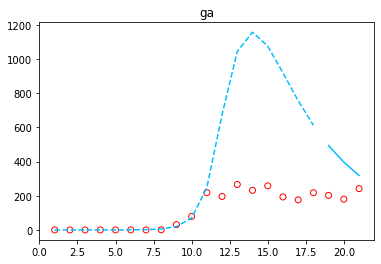

In [82]:
# plotting predictions and observations for State[i]
pyplot.scatter(x,y_true,facecolors="none", edgecolors="r")
pyplot.plot(x[:l],forecast[:l],linestyle='--',color='deepskyblue')
pyplot.plot(x[l:],forecast[l:],color='deepskyblue')
pyplot.title(State[i])